<a href="https://colab.research.google.com/github/hnnayy/DeepLearning/blob/main/week8-UTS/MLP_Target_col_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import math
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [4]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RegresiUTSTelkom.csv')



In [5]:
# View basic information about the dataset
print("Dataset Information:")
print(f"Number of rows and columns: {df.shape}")
print("\nFirst five rows:")
print(df.head())
print("\nStatistical description:")
print(df.describe())
print("\nData type info:")
print(df.info())

Dataset Information:
Number of rows and columns: (515344, 91)

First five rows:
   2001  49.94357  21.47114   73.0775   8.74861  -17.40628  -13.09905  \
0  2001  48.73215  18.42930  70.32679  12.94636  -10.32437  -24.83777   
1  2001  50.95714  31.85602  55.81851  13.41693   -6.57898  -18.54940   
2  2001  48.24750  -1.89837  36.29772   2.58776    0.97170  -26.21683   
3  2001  50.97020  42.20998  67.09964   8.46791  -15.85279  -16.81409   
4  2001  50.54767   0.31568  92.35066  22.38696  -25.51870  -19.04928   

   -25.01202  -12.23257   7.83089  ...   13.0162  -54.40548  58.99367  \
0    8.76630   -0.92019  18.76548  ...   5.66812  -19.68073  33.04964   
1   -3.27872   -2.35035  16.07017  ...   3.03800   26.05866 -50.92779   
2    5.05097  -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705   
3  -12.48207   -9.37636  12.63699  ...   9.92661  -55.95724  64.92712   
4   20.67345   -5.19943   3.63566  ...   6.59753  -50.69577  26.02574   

   15.37344   1.11144  -23.08793   68.4079

In [6]:
# Check missing values
print("\nNumber of missing values per column:")
print(df.isnull().sum())



Number of missing values per column:
2001         0
49.94357     0
21.47114     0
73.0775      0
8.74861      0
            ..
-23.08793    0
68.40795     0
-1.82223     0
-27.46348    0
2.26327      0
Length: 91, dtype: int64


In [7]:
# Separate features and target (first column as target)
y = df.iloc[:, 0]   # First column
X = df.iloc[:, 1:]  # All columns except the first one

# Create classification target (for classification model)
# Create binary target based on median
y_class = (y > y.median()).astype(int)

print("\nClass distribution of classification target:")
print(y_class.value_counts())



Class distribution of classification target:
2001
0    271270
1    244074
Name: count, dtype: int64


In [8]:

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns


In [9]:

# If there are categorical columns, we can add one-hot encoding
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features)
    ])

In [10]:
# Fit preprocessor on training data
preprocessor.fit(X_train)

# Transform data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)
X_train_class_processed = preprocessor.transform(X_train_class)
X_test_class_processed = preprocessor.transform(X_test_class)

# Examine the transformation results
print("\nData shape after preprocessing:")
print(f"X_train_processed: {X_train_processed.shape}")
print(f"X_test_processed: {X_test_processed.shape}")



Data shape after preprocessing:
X_train_processed: (412275, 90)
X_test_processed: (103069, 90)


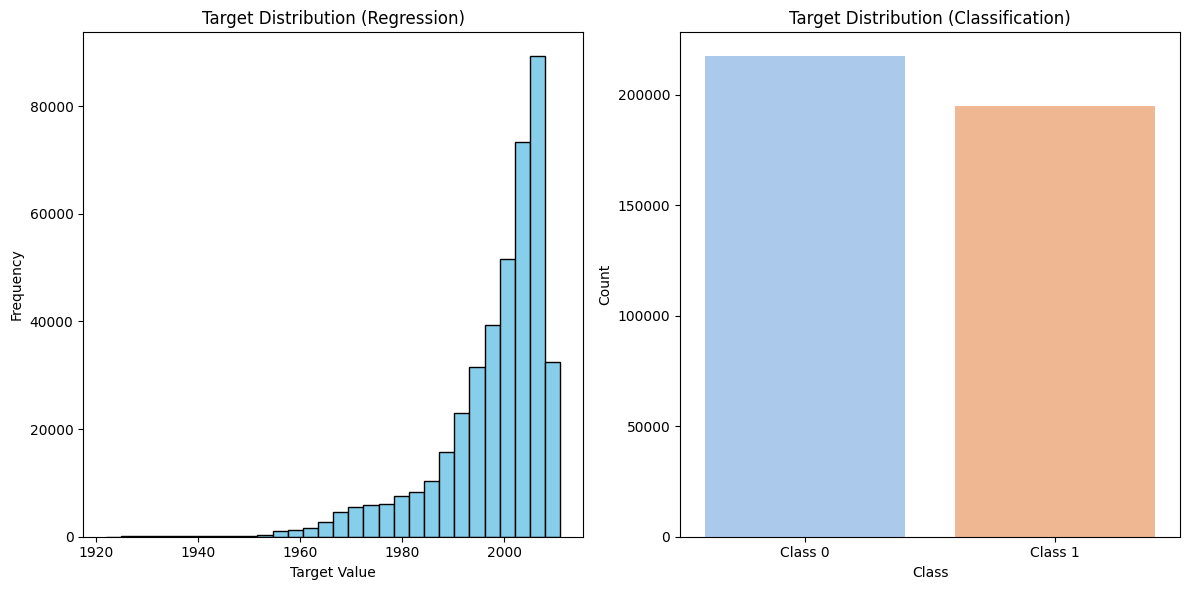

In [11]:
# Visualize data distribution after preprocessing
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Target Distribution (Regression)")
plt.hist(y_train, bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Target Value")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.title("Target Distribution (Classification)")
sns.countplot(x=y_train_class, palette='pastel')
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.tight_layout()
plt.show()


No categorical features for One-Hot Encoding


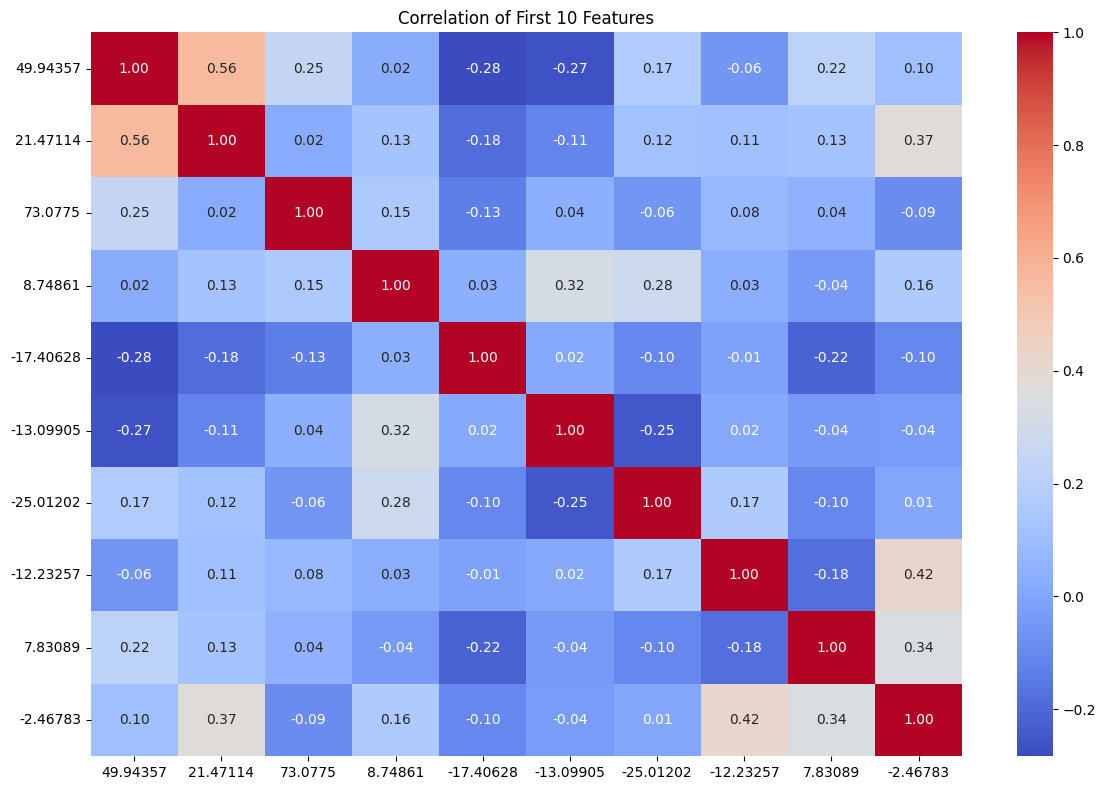

In [12]:
# Visualize One-Hot Encoding results (if there are categorical features)
if len(categorical_features) > 0:
    print("\nOne-Hot Encoding Visualization:")
    # Take a sample of data for visualization
    sample_data = X_train.sample(5)

    # One-hot encode the sample
    ohe = OneHotEncoder(sparse=False)
    sample_encoded = ohe.fit_transform(sample_data[categorical_features])

    # Create DataFrame for visualization
    encoded_df = pd.DataFrame(
        sample_encoded,
        columns=ohe.get_feature_names_out(categorical_features)
    )

    # Visualization
    plt.figure(figsize=(12, 6))
    sns.heatmap(encoded_df, cmap='viridis', cbar=True, annot=True)
    plt.title('One-Hot Encoding Visualization')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo categorical features for One-Hot Encoding")
    # Instead, display feature correlation visualization
    plt.figure(figsize=(12, 8))
    corr = X_train.corr().iloc[:10, :10]  # Take first 10x10 for easier visualization
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation of First 10 Features')
    plt.tight_layout()
    plt.show()


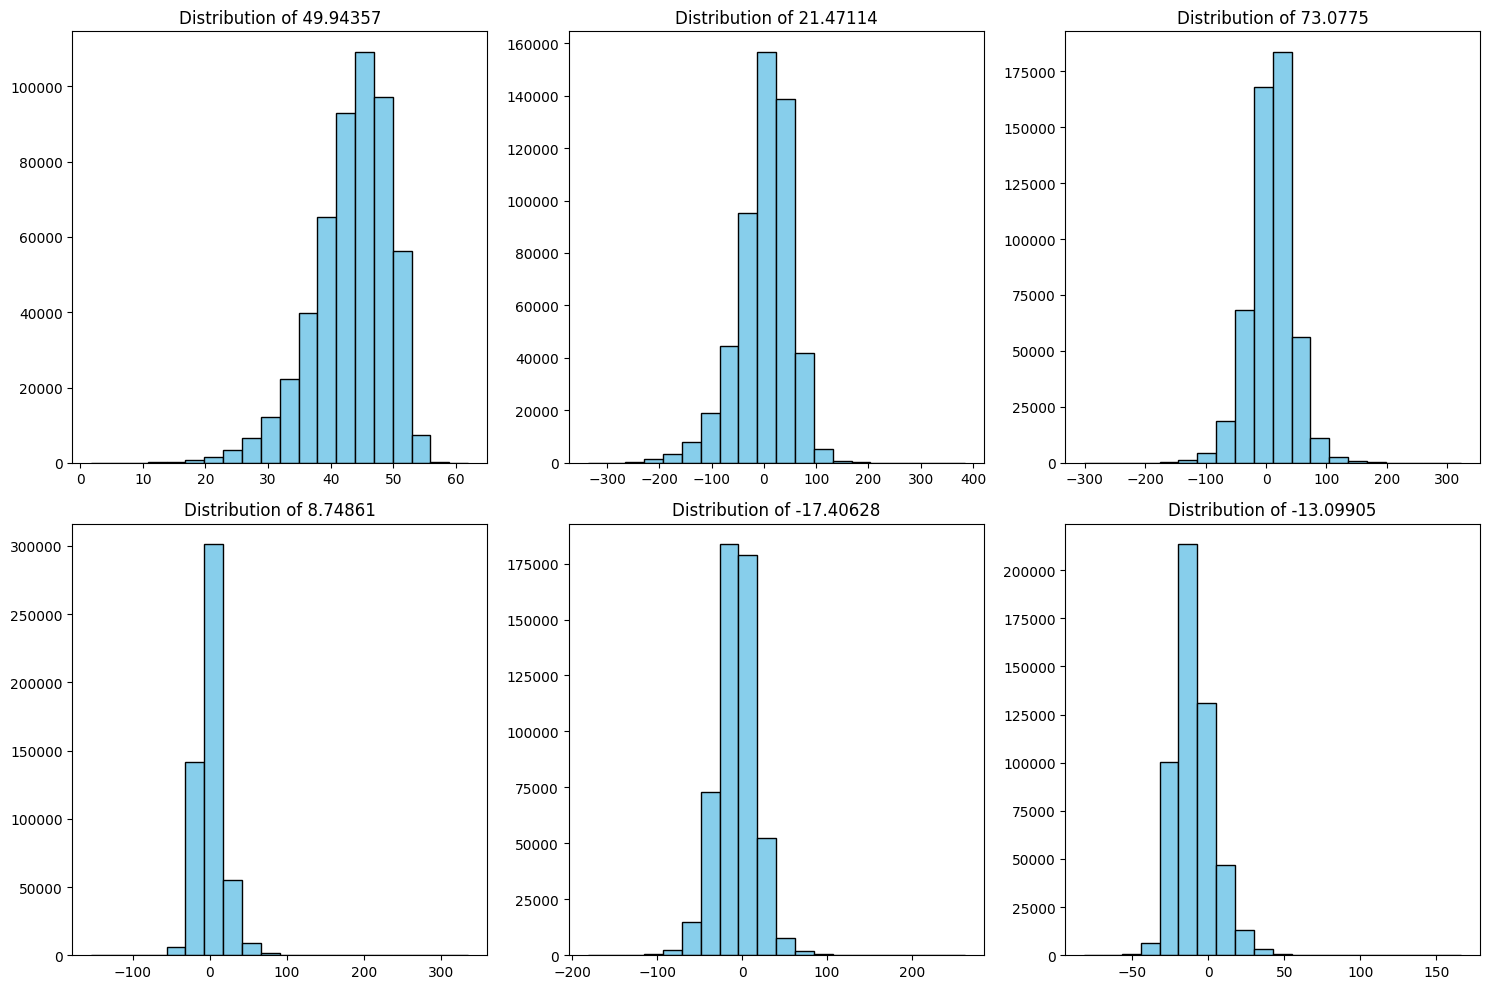

In [13]:
# Visualize distribution of some features
plt.figure(figsize=(15, 10))
for i, col in enumerate(X.columns[:6]):  # Only display first 6 features
    plt.subplot(2, 3, i+1)
    plt.hist(X[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## Deep Learning Model for REGRESSION


In [14]:
print("\n--- CREATING REGRESSION MODEL ---")

def create_regression_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)  # Output layer without activation for regression
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse'
    )
    return model


--- CREATING REGRESSION MODEL ---


In [15]:
# Create and train regression model
reg_model = create_regression_model(X_train_processed.shape[1])
print(reg_model.summary())

# Train model with callback
history_reg = reg_model.fit(
    X_train_processed, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ],
    verbose=1
)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        11,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,017 (86.00 KB)

 Trainable params: 22,017 (86.00 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - loss: 337928.7812 - val_loss: 2433.0378
Epoch 2/20
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - loss: 28538.9863 - val_loss: 515.9725
Epoch 3/20
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - loss: 18458.7344 - val_loss: 559.3594
Epoch 4/20
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - loss: 15832.5820 - val_loss: 237.3405
Epoch 5/20
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - loss: 13507.1143 - val_loss: 197.7812
Epoch 6/20
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - loss: 10871.6943 - val_loss: 164.2343
Epoch 7/20
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - loss: 6865.8301 - val_loss: 104.6372
Epoch 8/20
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 2327.7302 - val_loss: 84.9409
Epoch 9/20
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - loss: 145.4772 - val_loss: 78.8016
Epoch 10/20
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 82.4513 - val_loss: 76.7964
Epoch 11/20
10307/10307 ━━━━━━━━

In [16]:
# Evaluate regression model
y_pred_reg = reg_model.predict(X_test_processed)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred_reg)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred_reg)

print("\nRegression Model Evaluation Results:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

3221/3221 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step

Regression Model Evaluation Results:
MSE: 75.4008
RMSE: 8.6834
R²: 0.3647


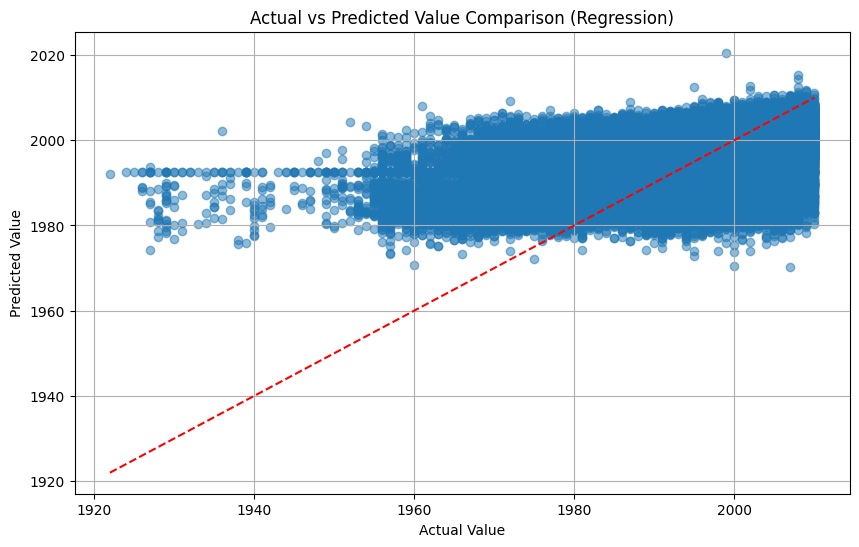

In [17]:
# Visualize actual vs predicted for regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_reg, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted Value Comparison (Regression)")
plt.grid(True)
plt.show()

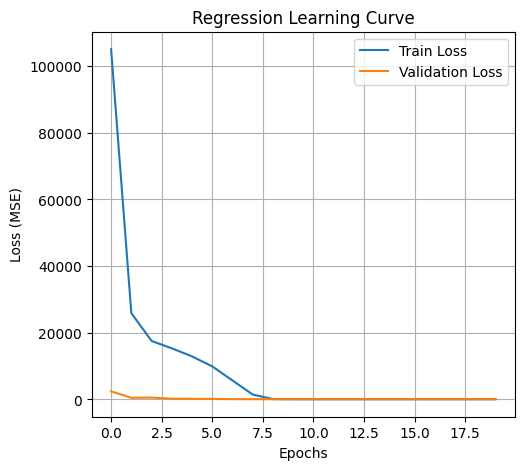

In [18]:
# Visualize learning curve for regression
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_reg.history['loss'], label='Train Loss')
plt.plot(history_reg.history['val_loss'], label='Validation Loss')
plt.title('Regression Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)


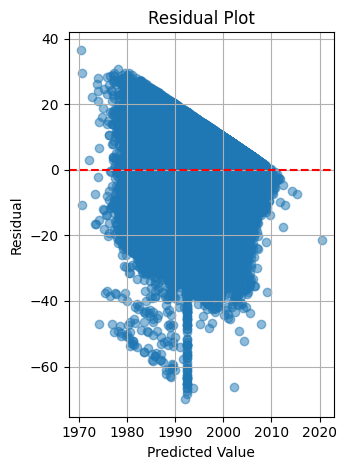

In [19]:
# Visualize residuals for regression
plt.subplot(1, 2, 2)
residuals = y_test - y_pred_reg.flatten()
plt.scatter(y_pred_reg, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.grid(True)
plt.tight_layout()
plt.show()


## Deep Learning Model for CLASSIFICATION

In [21]:
print("\n--- CREATING CLASSIFICATION MODEL ---")

def create_classification_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model


--- CREATING CLASSIFICATION MODEL ---


In [22]:
# Create and train classification model
class_model = create_classification_model(X_train_class_processed.shape[1])
print(class_model.summary())

# Train model with callback
history_class = class_model.fit(
    X_train_class_processed, y_train_class,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ],
    verbose=1
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │        11,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,017 (86.00 KB)

 Trainable params: 22,017 (86.00 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.6897 - loss: 0.5893 - val_accuracy: 0.7246 - val_loss: 0.5461
Epoch 2/5
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.7223 - loss: 0.5510 - val_accuracy: 0.7294 - val_loss: 0.5390
Epoch 3/5
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 0.7251 - loss: 0.5449 - val_accuracy: 0.7314 - val_loss: 0.5360
Epoch 4/5
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.7281 - loss: 0.5416 - val_accuracy: 0.7323 - val_loss: 0.5346
Epoch 5/5
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.7287 - loss: 0.5392 - val_accuracy: 0.7348 - val_loss: 0.5332


In [23]:
# Evaluate classification model
y_pred_class_prob = class_model.predict(X_test_class_processed)
y_pred_class = (y_pred_class_prob > 0.5).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)
auc_roc = roc_auc_score(y_test_class, y_pred_class_prob)
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

print("\nClassification Model Evaluation Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")


3221/3221 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step

Classification Model Evaluation Results:
Accuracy: 0.7354
Precision: 0.7239
Recall: 0.7182
F1-Score: 0.7210
AUC-ROC: 0.8102


In [24]:
print("\nClassification Report:")
print(classification_report(y_test_class, y_pred_class))



Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75     54002
           1       0.72      0.72      0.72     49067

    accuracy                           0.74    103069
   macro avg       0.73      0.73      0.73    103069
weighted avg       0.74      0.74      0.74    103069



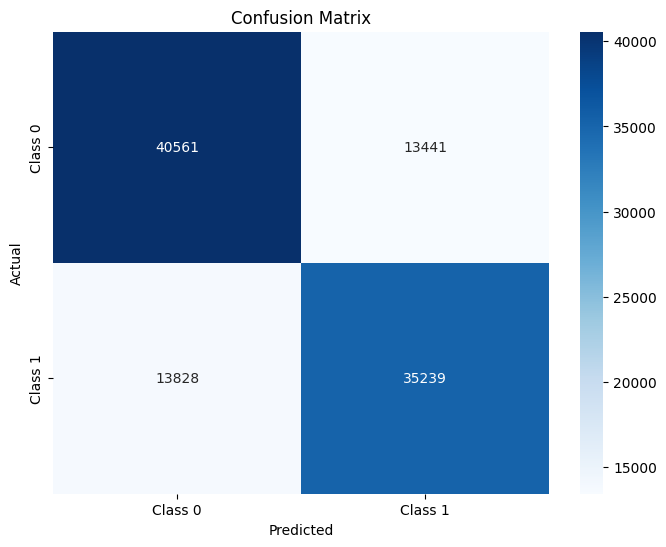

In [25]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

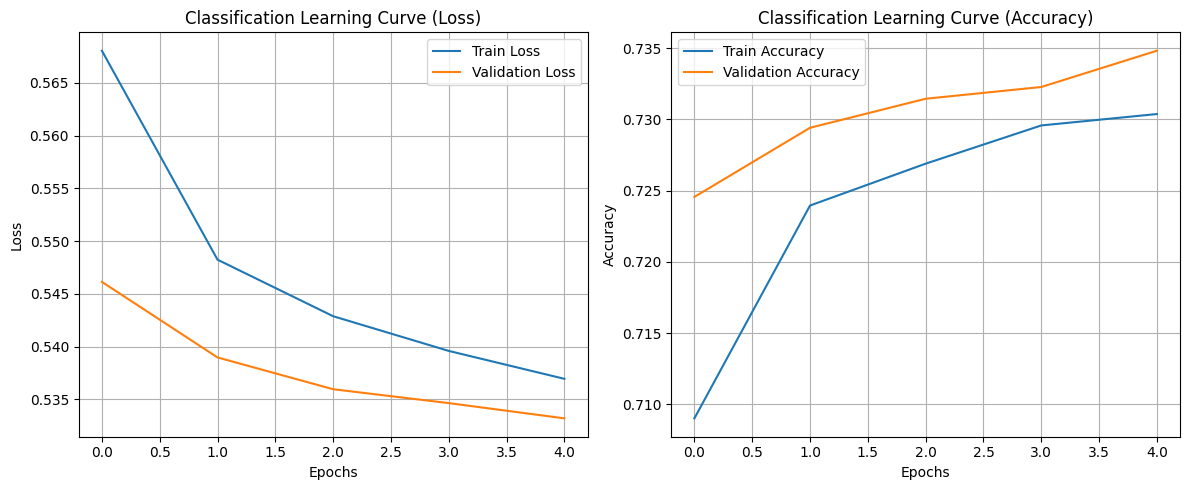

In [26]:
# Visualize learning curve for classification
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_class.history['loss'], label='Train Loss')
plt.plot(history_class.history['val_loss'], label='Validation Loss')
plt.title('Classification Learning Curve (Loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_class.history['accuracy'], label='Train Accuracy')
plt.plot(history_class.history['val_accuracy'], label='Validation Accuracy')
plt.title('Classification Learning Curve (Accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
# Determine best metrics for regression
print("\n--- BEST METRICS FOR REGRESSION ---")
print("Regression evaluation metrics summary:")
metrics_reg = {
    'MSE': mse,
    'RMSE': rmse,
    'R²': r2
}
best_metric_reg = max(metrics_reg.items(), key=lambda x: x[1] if x[0] == 'R²' else -x[1])
print(f"MSE: {mse:.4f} (lower is better)")
print(f"RMSE: {rmse:.4f} (lower is better)")
print(f"R²: {r2:.4f} (closer to 1 is better)")



--- BEST METRICS FOR REGRESSION ---
Regression evaluation metrics summary:
MSE: 75.4008 (lower is better)
RMSE: 8.6834 (lower is better)
R²: 0.3647 (closer to 1 is better)


In [28]:
if best_metric_reg[0] == 'R²':
    print(f"\nBest metric for regression model is R² with value {best_metric_reg[1]:.4f}")
    print("R² measures the proportion of variation in the dependent variable that can be explained by the model.")
    print("R² value close to 1 indicates a very good model.")
else:
    print(f"\nBest metric for regression model is {best_metric_reg[0]} with value {best_metric_reg[1]:.4f}")
    print("Low error value (MSE/RMSE) indicates a good model.")



Best metric for regression model is R² with value 0.3647
R² measures the proportion of variation in the dependent variable that can be explained by the model.
R² value close to 1 indicates a very good model.


In [29]:
# Determine best metrics for classification
print("\n--- BEST METRICS FOR CLASSIFICATION ---")
print("Classification evaluation metrics summary:")
metrics_class = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'AUC-ROC': auc_roc
}

for name, value in metrics_class.items():
    print(f"{name}: {value:.4f}")


--- BEST METRICS FOR CLASSIFICATION ---
Classification evaluation metrics summary:
Accuracy: 0.7354
Precision: 0.7239
Recall: 0.7182
F1-Score: 0.7210
AUC-ROC: 0.8102


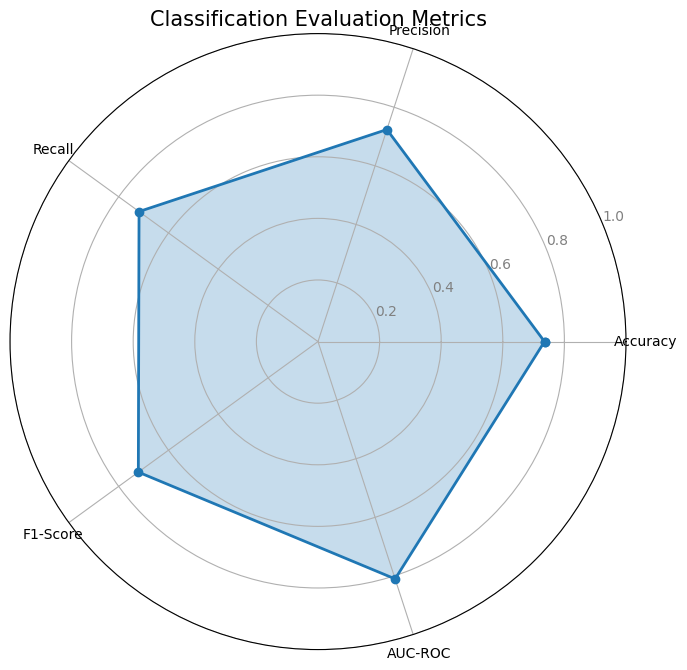

In [30]:
# Visualize classification metrics in radar chart
plt.figure(figsize=(8, 8))
categories = list(metrics_class.keys())
values = list(metrics_class.values())
values += values[:1]  # Duplicate first value to close the circle
angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # Duplicate first angle to close the circle
categories += categories[:1]  # Duplicate first category to close the circle

plt.polar(angles, values, 'o-', linewidth=2)
plt.fill(angles, values, alpha=0.25)
plt.xticks(angles[:-1], categories[:-1])
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ['0.2', '0.4', '0.6', '0.8', '1.0'], color='gray')
plt.ylim(0, 1)
plt.title('Classification Evaluation Metrics', size=15)
plt.show()


In [31]:
best_metric_class = max(metrics_class.items(), key=lambda x: x[1])
print(f"\nBest metric for classification model is {best_metric_class[0]} with value {best_metric_class[1]:.4f}")

print("\nBest metric explanation:")
if best_metric_class[0] == 'Accuracy':
    print("Accuracy measures the proportion of total correct predictions. Good for balanced datasets.")
elif best_metric_class[0] == 'Precision':
    print("Precision measures the proportion of correct positive predictions. Good when false positives must be minimized.")
elif best_metric_class[0] == 'Recall':
    print("Recall measures the proportion of actual positive cases correctly identified. Good when false negatives must be minimized.")
elif best_metric_class[0] == 'F1-Score':
    print("F1-Score is the harmonic mean of precision and recall. Good for imbalanced datasets.")
elif best_metric_class[0] == 'AUC-ROC':
    print("AUC-ROC measures the model's ability to distinguish between classes. Value of 1 indicates a perfect model.")



Best metric for classification model is AUC-ROC with value 0.8102

Best metric explanation:
AUC-ROC measures the model's ability to distinguish between classes. Value of 1 indicates a perfect model.


In [32]:
print("\nConclusion:")
print(f"For the regression model, {best_metric_reg[0]} is the best metric with value {best_metric_reg[1]:.4f}.")
print(f"For the classification model, {best_metric_class[0]} is the best metric with value {best_metric_class[1]:.4f}.")


Conclusion:
For the regression model, R² is the best metric with value 0.3647.
For the classification model, AUC-ROC is the best metric with value 0.8102.


# Hasil Evaluasi Model

## Model Regresi

### Mean Squared Error (MSE)
Mean Squared Error (MSE) dihitung dengan rumus:

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

di mana:
- $y_i$ adalah nilai aktual
- $\hat{y}_i$ adalah nilai prediksi
- $n$ adalah jumlah data

Untuk model ini, MSE adalah:
$$MSE = 75.4008$$

### Root Mean Squared Error (RMSE)
Root Mean Squared Error (RMSE) adalah akar kuadrat dari MSE:

$$RMSE = \sqrt{MSE}$$

Untuk model ini, RMSE adalah:
$$RMSE = 8.6834$$

### R-squared (R²)
R-squared mengukur proporsi varians pada variabel dependen yang dapat diprediksi dari variabel independen. R² dihitung dengan rumus:

$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

di mana:
- $\bar{y}$ adalah rata-rata nilai aktual

Untuk model ini, R² adalah:
$$R^2 = 0.3647$$

---

## Model Klasifikasi

### Akurasi
Akurasi adalah proporsi prediksi yang benar:

$$Akurasi = \frac{TP + TN}{TP + TN + FP + FN}$$

di mana:
- TP: True Positives
- TN: True Negatives
- FP: False Positives
- FN: False Negatives

Untuk model ini, akurasi adalah:
$$Akurasi = 0.7354$$

### Presisi
Presisi adalah proporsi prediksi positif yang benar dari semua prediksi positif yang dibuat:

$$Presisi = \frac{TP}{TP + FP}$$

Untuk model ini, presisi adalah:
$$Presisi = 0.7239$$

### Recall
Recall (juga dikenal sebagai Sensitivitas atau True Positive Rate) adalah proporsi prediksi positif yang benar dari semua kasus positif yang sebenarnya:

$$Recall = \frac{TP}{TP + FN}$$

Untuk model ini, recall adalah:
$$Recall = 0.7182$$

### F1-Score
F1-Score adalah rata-rata harmonis antara Presisi dan Recall:

$$F1\_Score = 2 \cdot \frac{Presisi \cdot Recall}{Presisi + Recall}$$

Untuk model ini, F1-Score adalah:
$$F1\_Score = 0.7210$$

### AUC-ROC
Area Under the Receiver Operating Characteristic Curve (AUC-ROC) mengukur seberapa baik model membedakan antara kelas-kelas. Nilai 1 menunjukkan klasifikasi yang sempurna, sementara 0.5 menunjukkan bahwa model tidak lebih baik dari tebakan acak.

Untuk model ini, AUC-ROC adalah:
$$AUC-ROC = 0.8102$$

---

## Kesimpulan

Dalam evaluasi ini:

- **Model Regresi**: MSE dan RMSE menunjukkan bahwa prediksi model agak meleset, dengan RMSE sebesar 8.6834, yang menunjukkan bahwa model mungkin perlu penyesuaian atau tuning lebih lanjut. Nilai R² sebesar 0.3647 mengindikasikan bahwa hanya sekitar 36% dari varians pada variabel dependen dapat dijelaskan oleh model, yang menunjukkan adanya ruang untuk perbaikan lebih lanjut.

- **Model Klasifikasi**: Model klasifikasi ini menunjukkan kinerja yang cukup baik, dengan akurasi 0.7354 dan Presisi serta Recall yang seimbang di sekitar 0.72. F1-Score sebesar 0.7210 menunjukkan keseimbangan yang baik antara Presisi dan Recall. AUC-ROC sebesar 0.8102 mengindikasikan bahwa model cukup baik dalam membedakan antara dua kelas.

# Analisis

## 1. Modifikasi Arsitektur MLP untuk Mengatasi Underfitting

Jika model MLP (256-128-64) mengalami underfitting, modifikasi berikut dapat dilakukan:

### Modifikasi yang Diusulkan:
- **Meningkatkan kompleksitas model** (512-256-128 atau menambah layer)
- **Menurunkan regularisasi** (mengurangi dropout atau L2)
- **Menggunakan aktivasi non-linear yang lebih kompleks** (Leaky ReLU)
- **Memodifikasi optimizer** (meningkatkan learning rate)

### Analisis Bias-Variance:
- Underfitting menunjukkan **bias tinggi** dan **variance rendah**
- Meningkatkan kompleksitas menurunkan bias, tetapi berisiko meningkatkan variance
- Mengurangi regularisasi membantu model menangkap lebih banyak pola
- Keseimbangan antara kapasitas model dan regularisasi adalah kunci

## 2. Alternatif Loss Function

### Huber Loss
- **Kelebihan**: Gabungan MSE dan MAE, robust terhadap outlier
- **Kekurangan**: Perlu tuning hyperparameter delta
- **Unggul pada**: Dataset dengan beberapa outlier signifikan

### Mean Absolute Error (MAE)
- **Kelebihan**: Sangat robust terhadap outlier
- **Kekurangan**: Gradien konstan, konvergensi lambat
- **Unggul pada**: Dataset dengan noise besar atau outlier ekstrem

### Log-Cosh Loss
- **Kelebihan**: Gabungan sifat MSE dan MAE, optimasi stabil
- **Kekurangan**: Komputasi lebih rumit
- **Unggul pada**: Dataset dengan kombinasi nilai normal dan beberapa outlier

## 3. Pengaruh Perbedaan Skala Fitur (0-1 vs 100-1000)

### Mekanisme yang Terdampak:
- **Gradien**: Fitur berskala besar menghasilkan gradien besar, menyebabkan ketidakstabilan
- **Weight Updates**: Bobot untuk fitur skala besar berubah cepat, fitur skala kecil berubah lambat
- **Feature Dominance**: Fitur berskala besar mendominasi perhitungan di hidden layer

### Dampak:
- Konvergensi lambat atau gagal
- Model bias terhadap fitur berskala besar
- Stabilitas numerik berkurang

Normalisasi/standardisasi fitur sangat penting untuk mengatasi masalah ini.

## 4. Mengukur Kontribusi Fitur

### 1. Permutation Feature Importance
- **Metodologi**: Acak nilai fitur, ukur penurunan performa
- **Keterbatasan**: Tidak menangkap interaksi kompleks, komputasi mahal

### 2. SHAP Values
- **Metodologi**: Menghitung kontribusi marginal untuk setiap kombinasi fitur
- **Keterbatasan**: Komputasi intensif, interpretasi kompleks

### 3. Integrated Gradients
- **Metodologi**: Mengintegrasikan gradien dari baseline ke input aktual
- **Keterbatasan**: Memerlukan model diferensiabel, sensitif terhadap baseline

### 4. Analisis Bobot Model
- **Metodologi**: Analisis magnitude bobot dari input ke layer pertama
- **Keterbatasan**: Sederhana, tidak memperhitungikan interaksi antar fitur

## 5. Eksperimen untuk Learning Rate dan Batch Size

### Metodologi:
1. **Learning Rate Range Test**: Identifikasi rentang learning rate potensial
2. **Grid Search**: Uji kombinasi LR dan batch size dengan validasi silang
3. **Learning Rate Schedulers**: Uji berbagai scheduler untuk kombinasi terbaik

### Tradeoffs:
- **Batch Size Kecil**: Efek regularisasi, update lebih sering, tetapi kurang efisien
- **Batch Size Besar**: Estimasi gradien akurat, efisien komputasi, tetapi memori besar
- **LR Kecil**: Stabil tetapi lambat
- **LR Besar**: Potensial cepat tetapi berisiko divergen

Relasi empiris: $\eta_{\text{new}} = \eta_{\text{base}} \times \sqrt{\frac{\text{BS}_{\text{new}}}{\text{BS}_{\text{base}}}}$

Eksperimen mencari keseimbangan antara kecepatan konvergensi, stabilitas, performa, dan efisiensi komputasi.